# Setup and Fetch Data

Press the play button in Google Colab or press `Shift+Enter` execute the cell below to download and load the data and packages for this assignment

In [1]:
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
%matplotlib inline

!curl https://raw.githubusercontent.com/ZacharySBrown/vcu-scma440-2021q1/master/utils/fetch_a1.sh > fetch_a1.sh
!bash fetch_a1.sh

# Example
time_series = pd.read_csv('a1_beer_time_series.csv', 
                        names=['date','megaliters'], 
                          parse_dates=['date']).set_index('date')
data = pd.read_csv('a1_beer_data.csv').set_index('month')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   102  100   102    0     0    708      0 --:--:-- --:--:-- --:--:--   708
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   243    0   243    0     0   2892      0 --:--:-- --:--:-- --:--:--  2858


# Problem 1
Consider the data below for monthly beer production. Use the code below and the output produced to answer the following questions

#### 1a) What is your best estimate for beer production in **September 1989**
Include a 95% prediction interval (`z=1.96`) in your answer, and write as: `123.45 +- 4.56`

#### 1b) Plot and describe any observed pattern types in the data

## Problem 1a

### Inspecting the data

Let's start by printing out the data. The `data` variable is called a `DataFrame`, which is a table-like data structure with rows and columns. In this case, we have a row for each month and a columns for each year of observations. 

Notice the `NaN` ("Not a number") values, or data for which we don't have observations.

Note that you may have to scroll to the right (over the table output) to see more years.

*Press the play button in Google Colab or press `Shift+Enter` execute the cell below*

In [2]:
display(data)

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989
month,,,,,,,,,,,,,,,,,,,,,
January,93.2,95.9,96.3,89.8,97.1,105.1,100.0,106.0,106.1,106.9,...,161.2,177.2,154.1,153.3,172.0,164.4,147.0,139.0,151.0,138.0
February,96.0,82.8,84.4,84.4,93.0,92.5,84.8,91.2,102.1,96.6,...,155.5,127.4,159.3,144.3,150.6,148.1,133.0,143.0,134.0,136.0
March,95.2,83.3,91.2,87.2,96.0,97.1,94.3,96.6,105.2,127.3,...,141.9,177.1,160.4,169.6,163.3,152.0,163.0,150.0,164.0,152.0
April,77.1,80.0,81.9,85.6,80.5,81.4,87.1,96.3,101.0,98.2,...,164.6,154.4,151.9,143.7,153.7,144.1,150.0,154.0,126.0,127.0
May,70.9,80.4,80.5,72.0,76.1,79.1,90.3,88.2,84.3,100.2,...,136.2,135.2,148.4,160.1,152.9,155.0,129.0,137.0,131.0,151.0
June,64.8,67.5,70.4,69.2,69.9,72.1,72.4,70.2,87.5,89.4,...,126.8,126.4,139.6,135.6,135.5,124.5,131.0,129.0,125.0,130.0
July,70.1,75.7,74.8,77.5,73.6,78.7,84.9,86.5,92.7,95.3,...,152.5,147.3,148.2,141.8,148.5,153.0,145.0,128.0,127.0,119.0
August,77.3,71.1,75.9,78.1,92.6,87.1,92.7,88.2,94.4,104.2,...,126.6,140.6,153.5,159.9,148.4,146.0,137.0,140.0,143.0,153.0
September,79.5,89.3,86.3,94.3,94.2,91.4,92.2,102.8,113.0,106.4,...,150.1,152.3,145.1,145.7,133.6,138.0,138.0,143.0,143.0,NaN


### Calculating the mean and mean squared error for each month

To estimate the mean and mean squared error (MSE), we can use the `.mean(axis=1)` and `.var(axis=1)` functions on the `data` `DataFrame`. 

The `axis=1` argument means that we want to take the mean/var over the *rows*). 

We can assign the output of these functions to a _new_ column in the dataframe using the code below. 

This code will compute the mean and MSE for each month, and leave out the `NaN` values appropriately, then print out the `DataFrame` with the new columns included. 

*Use this data to answer question 1a), recalling the formula for computing a one-step prediction interval using the `MSE`. 

*Press the play button in Google Colab or press `Shift+Enter` to execute the cell below*

In [3]:
# Create a new column that holds the mean for each month
data['mean'] = data.mean(axis=1)
data['MSE'] = data.var(axis=1)
display(data)

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,1982,1983,1984,1985,1986,1987,1988,1989,mean,MSE
month,,,,,,,,,,,,,,,,,,,,,
January,93.2,95.9,96.3,89.8,97.1,105.1,100.0,106.0,106.1,106.9,...,154.1,153.3,172.0,164.4,147.0,139.0,151.0,138.0,139.575000,865.254875
February,96.0,82.8,84.4,84.4,93.0,92.5,84.8,91.2,102.1,96.6,...,159.3,144.3,150.6,148.1,133.0,143.0,134.0,136.0,130.860000,739.889400
March,95.2,83.3,91.2,87.2,96.0,97.1,94.3,96.6,105.2,127.3,...,160.4,169.6,163.3,152.0,163.0,150.0,164.0,152.0,142.342500,931.489944
April,77.1,80.0,81.9,85.6,80.5,81.4,87.1,96.3,101.0,98.2,...,151.9,143.7,153.7,144.1,150.0,154.0,126.0,127.0,128.535000,817.037775
May,70.9,80.4,80.5,72.0,76.1,79.1,90.3,88.2,84.3,100.2,...,148.4,160.1,152.9,155.0,129.0,137.0,131.0,151.0,125.160000,873.250900
June,64.8,67.5,70.4,69.2,69.9,72.1,72.4,70.2,87.5,89.4,...,139.6,135.6,135.5,124.5,131.0,129.0,125.0,130.0,111.782500,703.901444
July,70.1,75.7,74.8,77.5,73.6,78.7,84.9,86.5,92.7,95.3,...,148.2,141.8,148.5,153.0,145.0,128.0,127.0,119.0,120.857500,777.518444
August,77.3,71.1,75.9,78.1,92.6,87.1,92.7,88.2,94.4,104.2,...,153.5,159.9,148.4,146.0,137.0,140.0,143.0,153.0,127.697500,803.705244
September,79.5,89.3,86.3,94.3,94.2,91.4,92.2,102.8,113.0,106.4,...,145.1,145.7,133.6,138.0,138.0,143.0,143.0,NaN,130.476923,621.976647


### Problem 1a Answer

*Please delete this text and type your answer to Problem 1a here*

## Problem 1b

### Plotting the time series

The `time_series` `DataFrame` contains all fo the data in order, stacked on top of each other, with the `megaliters` column containing the value of the production for each year and month combination. We'll use this to create a simple time series plot of the data

*Press the play button in Google Colab or press `Shift+Enter` execute the cell below*

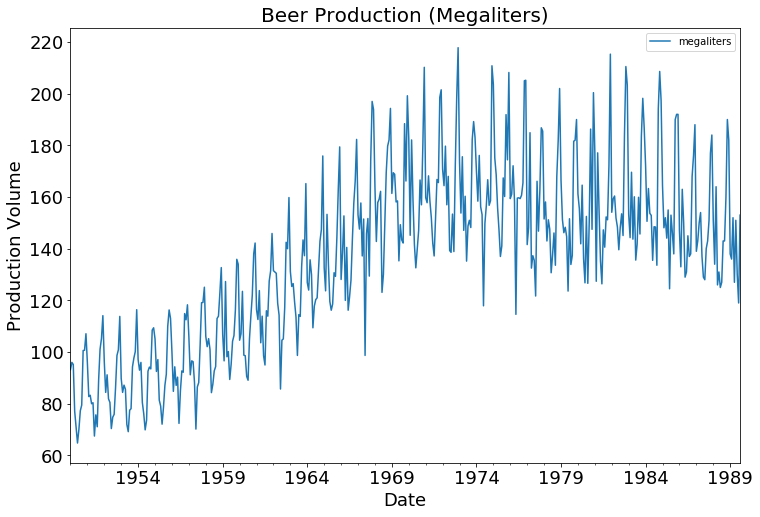

In [8]:
FONT_SIZE = 18
f = plt.figure(figsize=(12,8))
ax=plt.subplot()
time_series.plot(ax=ax,fontsize=FONT_SIZE)
title = plt.title('Beer Production (Megaliters)', size=FONT_SIZE+2)
x_yabel = plt.xlabel('Date', size=FONT_SIZE)
y_yabel = plt.ylabel('Production Volume', size=FONT_SIZE)

### Problem 1b Answer

*Please delete this text and type your answer to Problem 1b here*